© 2024 Rebecca J. Rousseau and Justin B. Kinney, *Algebraic and diagrammatic methods for the rule-based modeling of multi-particle complexes*. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).
___

# Results from deterministic and stochastic simulations of various non-equilibrium systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import pdb

This notebook compiles and generates figures for all computational simulation results found in Fig. 7 and Fig. 9 of the paper. All time points, averages, and standard deviations for complex counts across systems are stored in the `simulationdata` folder of the repository:

In [2]:
folderpath = "../simulationdata"

# Table of contents
1. [Monomer deterministic vs. stochastic comparison (N = 20)](#moncomp)
2. [Homodimer deterministic vs. stochastic comparison (N = 4)](#homodimcomp)
3. [Homopolymer deterministic vs. stochastic comparison (N = 3)](#homopolcomp)
4. [Monomer (N = 100)](#monomer)
5. [Homodimer (N = 100)](#homodimer)
6. [Homopolymer (N = 100)](#homopolymer)
7. [Heterodimer (N = 100)](#heterodimer)
8. [Occlusive binding (N = 100)](#occlusive)
9. [Cooperative binding (N = 100)](#cooperative)
10. [Linear heteropolymer (N = 100)](#heteropolymer)
11. [Branched homopolymer (N = 100)](#branchedhomopolymer)

---
# Deterministic and stochastic simulations of non-equilibrium monomer, homodimer, and homopolymer systems (Fig. 7)
---

 # MONOMER DETERMINISTIC VS. STOCHASTIC COMPARISON (N = 20) <a name="moncomp"></a>

$$ N = 20, \quad r_{1} = 1, \quad r_{2} = 1 $$

In [3]:
# Import deterministic simulation results for monomer counts

df = pd.read_csv(f"{folderpath}/A_of_t_monomer_N20.csv",header=None)
dfn = df.to_numpy()
deterministic = dfn

# Import stochastic simulation results for average and standard deviation of monomer counts

dfmoncomptime = pd.read_csv(f"{folderpath}/monomer_timebins_N20.csv",header=None)
dfnmoncomptime = dfmoncomptime.to_numpy()
dfavgcomp = pd.read_csv(f"{folderpath}/monomer_avgtablecomp_N20.csv",header=None)
avgtablecomp = dfavgcomp.to_numpy()
dfstdcomp = pd.read_csv(f"{folderpath}/monomer_stdtablecomp_N20.csv",header=None)
stdtablecomp = dfstdcomp.to_numpy()

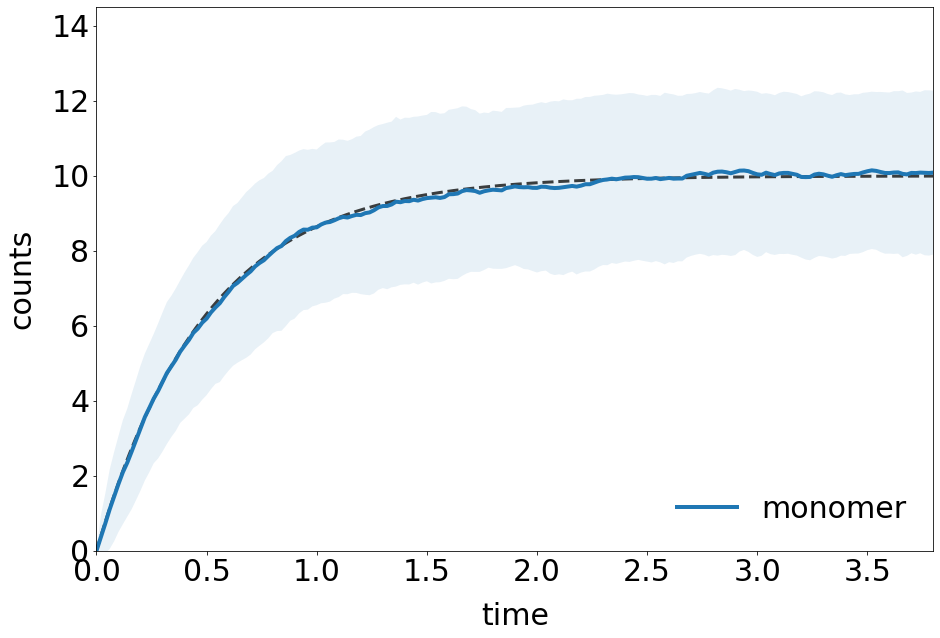

In [4]:
# Plot comparison

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(np.linspace(0,10,2001),deterministic,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(dfnmoncomptime, 
        dfavgcomp,
        label='monomer', 
        alpha=1, linewidth=4, color='#1f77b4')
plt.fill_between(dfnmoncomptime[:,0],(avgtablecomp-stdtablecomp)[:,0],\
                (avgtablecomp+stdtablecomp)[:,0],alpha=0.1)
plt.legend(loc='lower right',framealpha=0)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 14.5])
plt.xlim([0, 3.8])
plt.savefig('monomercomparison_N20_r1d1.png',bbox_inches='tight')

# HOMODIMER DETERMINISTIC VS. STOCHASTIC COMPARISON (N = 4) <a name="homodimcomp"></a>

$$ N = 4, \quad r_{1} = 2, \quad r_{2} = 2, \quad r_{3} = 0.5, \quad r_{4}= 1 $$

In [5]:
# Import deterministic simulation results for monomer and homodimer counts

dfA = pd.read_csv(f"{folderpath}/A_of_t_homodimer_N4.csv",header=None)
dfI = pd.read_csv(f"{folderpath}/I_of_t_homodimer_N4.csv",header=None)
dfnA = dfA.to_numpy()
dfnI = dfI.to_numpy()

# Import stochastic simulation results for average and standard deviation of monomer and homodimer counts

dfdimcomptime = pd.read_csv(f"{folderpath}/homodimer_timebins_N4.csv", header=None)
dimcomptime = dfdimcomptime.to_numpy()
dfdimcomp1c = pd.read_csv(f"{folderpath}/homodimer_monbins_N4.csv", header=None)
dimcompmon = dfdimcomp1c.to_numpy()
dfdimcomp2c = pd.read_csv(f"{folderpath}/homodimer_2cbins_N4.csv", header=None)
dimcomptwoc = dfdimcomp2c.to_numpy()

dfdimcomp1cstd = pd.read_csv(f"{folderpath}/homodimer_monbinsstd_N4.csv", header=None)
dimcompmonstd = dfdimcomp1cstd.to_numpy()
dfdimcomp2cstd = pd.read_csv(f"{folderpath}/homodimer_2cbinsstd_N4.csv", header=None)
dimcomptwocstd = dfdimcomp2cstd.to_numpy()

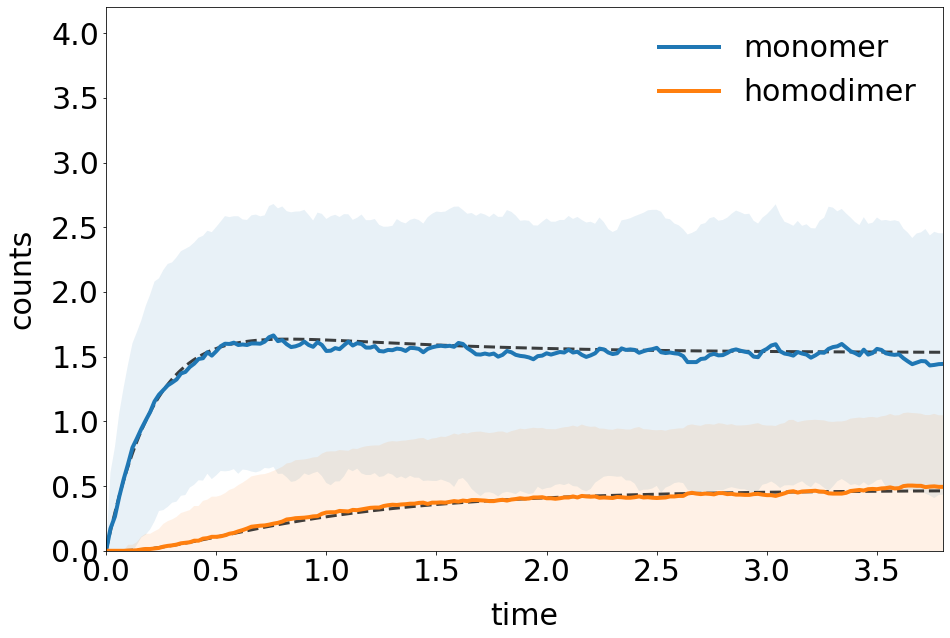

In [6]:
# Plot comparison

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(np.linspace(0,10,2001),dfnA,'--', linewidth=3, color='#000000', alpha=0.75)
plt.plot(dimcomptime,dimcompmon,label='monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(dimcomptime[:,0], (dimcompmon-dimcompmonstd)[:,0], (dimcompmon+dimcompmonstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfnI,'--', linewidth=3, color='#000000', alpha=0.75)
plt.plot(dimcomptime,dimcomptwoc,label='homodimer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(dimcomptime[:,0], (dimcomptwoc - dimcomptwocstd)[:,0], (dimcomptwoc + dimcomptwocstd)[:,0], alpha=0.1)

plt.legend(loc='upper right',framealpha=0)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 4.2])
plt.xlim([0, 3.8])
plt.savefig('homodimercomparison_N4_r2d2p05q1.png',bbox_inches='tight')

# HOMOPOLYMER DETERMINISTIC VS. STOCHASTIC COMPARISON (N = 3) <a name="homopolcomp"></a>

$$ N = 3, \quad r_{1} = 2, \quad r_{2} = 2, \quad r_{3} = 0.5, \quad r_{4}= 1 $$

In [7]:
# Import deterministic simulation results for homopolymer complex counts

dfApol = pd.read_csv(f"{folderpath}/A_of_t_homopol_N3.csv",header=None)
df1rpol = pd.read_csv(f"{folderpath}/Aring_of_t_homopol_N3.csv",header=None)
df2cpol = pd.read_csv(f"{folderpath}/twochain_of_t_homopol_N3.csv",header=None)
df3cpol = pd.read_csv(f"{folderpath}/threechain_of_t_homopol_N3.csv",header=None)
df2rpol = pd.read_csv(f"{folderpath}/tworing_of_t_homopol_N3.csv",header=None)
df3rpol = pd.read_csv(f"{folderpath}/threering_of_t_homopol_N3.csv",header=None)
dfnApol = dfApol.to_numpy()
dfn1rpol = df1rpol.to_numpy()
dfn2cpol = df2cpol.to_numpy()
dfn3cpol = df3cpol.to_numpy()
dfn2rpol = df2rpol.to_numpy()
dfn3rpol = df3rpol.to_numpy()

# Import stochastic simulation results for average and standard deviation of homopolymer complex counts

dfpolcomptime = pd.read_csv(f"{folderpath}/homopolymer_timebins_N3.csv", header=None)
polcomptime = dfpolcomptime.to_numpy()

dfpolcomp1c = pd.read_csv(f"{folderpath}/homopolymer_monbins_N3.csv", header=None)
polcomp1c = dfpolcomp1c.to_numpy()

dfpolcomp2c = pd.read_csv(f"{folderpath}/homopolymer_2cbins_N3.csv", header=None)
polcomp2c = dfpolcomp2c.to_numpy()

dfpolcomp3c = pd.read_csv(f"{folderpath}/homopolymer_3cbins_N3.csv", header=None)
polcomp3c = dfpolcomp3c.to_numpy()

dfpolcomp1r = pd.read_csv(f"{folderpath}/homopolymer_1rbins_N3.csv", header=None)
polcomp1r = dfpolcomp1r.to_numpy()

dfpolcomp2r = pd.read_csv(f"{folderpath}/homopolymer_2rbins_N3.csv", header=None)
polcomp2r = dfpolcomp2r.to_numpy()

dfpolcomp3r = pd.read_csv(f"{folderpath}/homopolymer_3rbins_N3.csv", header=None)
polcomp3r = dfpolcomp3r.to_numpy()

dfpolcomp1cstd = pd.read_csv(f"{folderpath}/homopolymer_monbinsstd_N3.csv", header=None)
polcomp1cstd = dfpolcomp1cstd.to_numpy()

dfpolcomp2cstd = pd.read_csv(f"{folderpath}/homopolymer_2cbinsstd_N3.csv", header=None)
polcomp2cstd = dfpolcomp2cstd.to_numpy()

dfpolcomp3cstd = pd.read_csv(f"{folderpath}/homopolymer_3cbinsstd_N3.csv", header=None)
polcomp3cstd = dfpolcomp3cstd.to_numpy()

dfpolcomp1rstd = pd.read_csv(f"{folderpath}/homopolymer_1rbinsstd_N3.csv", header=None)
polcomp1rstd = dfpolcomp1rstd.to_numpy()

dfpolcomp2rstd = pd.read_csv(f"{folderpath}/homopolymer_2rbinsstd_N3.csv", header=None)
polcomp2rstd = dfpolcomp2rstd.to_numpy()

dfpolcomp3rstd = pd.read_csv(f"{folderpath}/homopolymer_3rbinsstd_N3.csv", header=None)
polcomp3rstd = dfpolcomp3rstd.to_numpy()

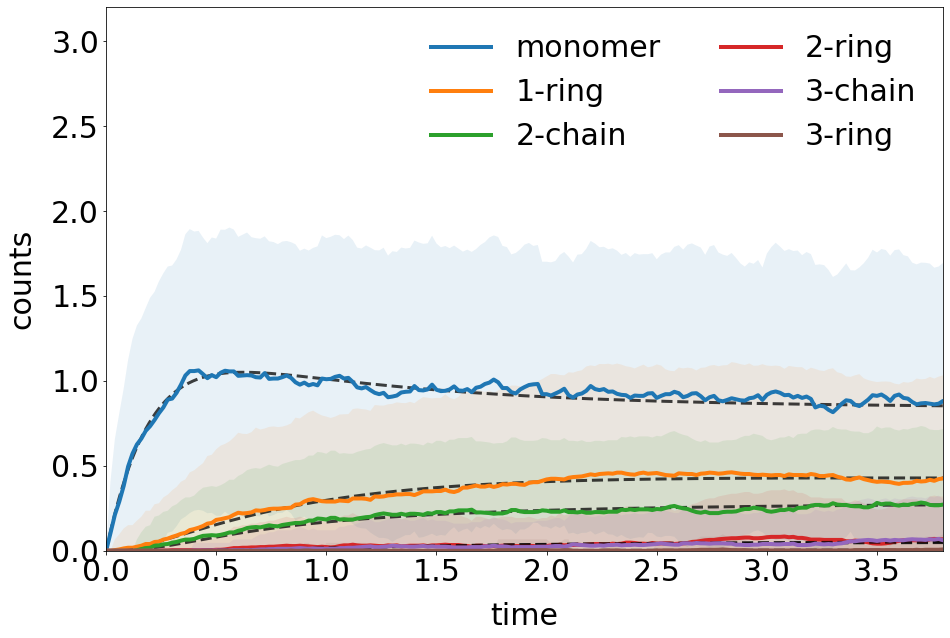

In [8]:
# Plot comparison

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(np.linspace(0,10,2001),dfnApol, '--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp1c,label='monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(polcomptime[:,0], (polcomp1c-polcomp1cstd)[:,0], (polcomp1c+polcomp1cstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfn1rpol,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp1r,label='1-ring',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(polcomptime[:,0], (polcomp1r-polcomp1rstd)[:,0], (polcomp1r+polcomp1rstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfn2cpol,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp2c,label='2-chain',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(polcomptime[:,0], (polcomp2c - polcomp2cstd)[:,0], (polcomp2c + polcomp2cstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfn2rpol,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp2r,label='2-ring',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(polcomptime[:,0], (polcomp2r-polcomp2rstd)[:,0], (polcomp2r+polcomp2rstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfn3cpol,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp3c,label='3-chain',alpha=1,linewidth=4, color='#9467bd')
plt.fill_between(polcomptime[:,0], (polcomp3c - polcomp3cstd)[:,0], (polcomp3c + polcomp3cstd)[:,0], alpha=0.1)

plt.plot(np.linspace(0,10,2001),dfn3rpol,'--', linewidth=3, color='#000000',alpha=0.75)
plt.plot(polcomptime,polcomp3r,label='3-ring',alpha=1,linewidth=4, color='#8c564b')
plt.fill_between(polcomptime[:,0], (polcomp3r - polcomp3rstd)[:,0], (polcomp3r + polcomp3rstd)[:,0], alpha=0.1)

plt.legend(loc='upper right',framealpha=0,ncol=2)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 3.2])
plt.xlim([0, 3.8])
plt.savefig('homopolymercomparison_N3_r2d2p05q1.png',bbox_inches='tight')

# MONOMER (N = 100) <a name="monomer"></a>

$$ N = 100, \quad r_{1} = 2, \quad r_{2} = 1 $$

In [9]:
# Import stochastic simulation results for average and standard deviation of monomer counts

dfmontime = pd.read_csv(f"{folderpath}/monomer_timebins_N100.csv",header=None)
dfnmontime = dfmontime.to_numpy()
dfavg = pd.read_csv(f"{folderpath}/monomer_avgtablecomp_N100.csv",header=None)
avgtable = dfavg.to_numpy()
dfstd = pd.read_csv(f"{folderpath}/monomer_stdtablecomp_N100.csv",header=None)
stdtable = dfstd.to_numpy()

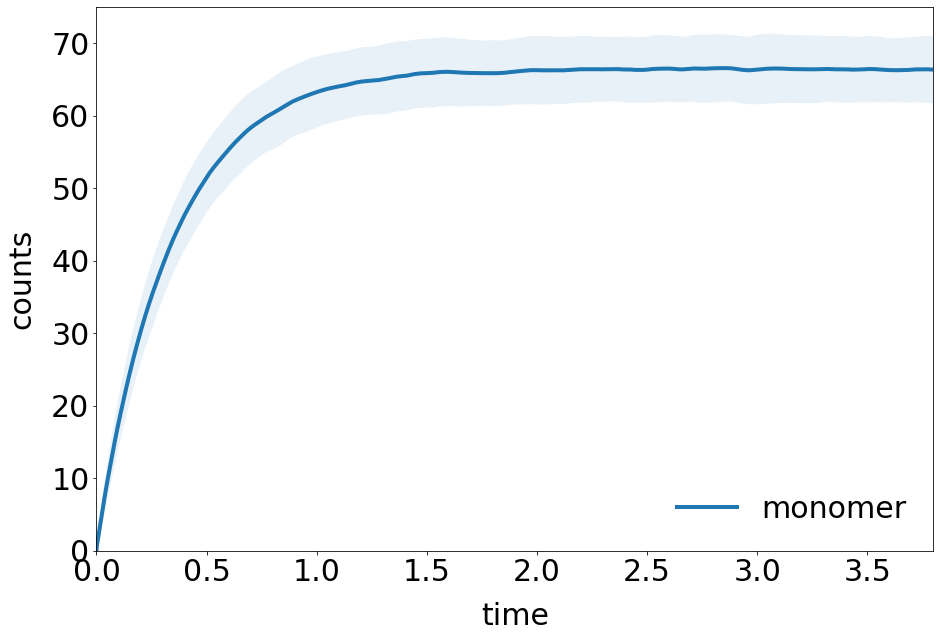

In [10]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(dfnmontime, 
        dfavg, 
        alpha=1, linewidth=4,label='monomer')
plt.fill_between(dfnmontime[:,0],(avgtable-stdtable)[:,0],\
                (avgtable+stdtable)[:,0],alpha=0.1)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.legend(loc='lower right',framealpha=0)
plt.ylim([0, 75])
plt.xlim([0, 3.8])
plt.savefig('fig_monomer_N100_r2d1.png',bbox_inches='tight')

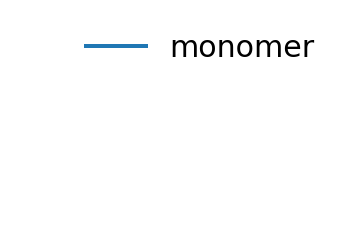

In [11]:
# OPTIONAL: Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='monomer')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_monomer_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# HOMODIMER (N = 100) <a name="homodimer"></a>

$$ N = 100, \quad r_{1} = 2, \quad r_{2} = 1, \quad r_{3} = 0.03, \quad r_{4} = 1 $$

In [12]:
# Import stochastic simulation results for average and standard deviation of monomer and homodimer counts

dfdimtime = pd.read_csv(f"{folderpath}/homodimer_timebins_N100.csv", header=None)
time = dfdimtime.to_numpy()
dfdim1c = pd.read_csv(f"{folderpath}/homodimer_monbins_N100.csv", header=None)
dimmon = dfdim1c.to_numpy()
dfdim2c = pd.read_csv(f"{folderpath}/homodimer_2cbins_N100.csv", header=None)
dimtwoc = dfdim2c.to_numpy()

dfdim1cstd = pd.read_csv(f"{folderpath}/homodimer_monbinsstd_N100.csv", header=None)
dimmonstd = dfdim1cstd.to_numpy()
dfdim2cstd = pd.read_csv(f"{folderpath}/homodimer_2cbinsstd_N100.csv", header=None)
dimtwocstd = dfdim2cstd.to_numpy()

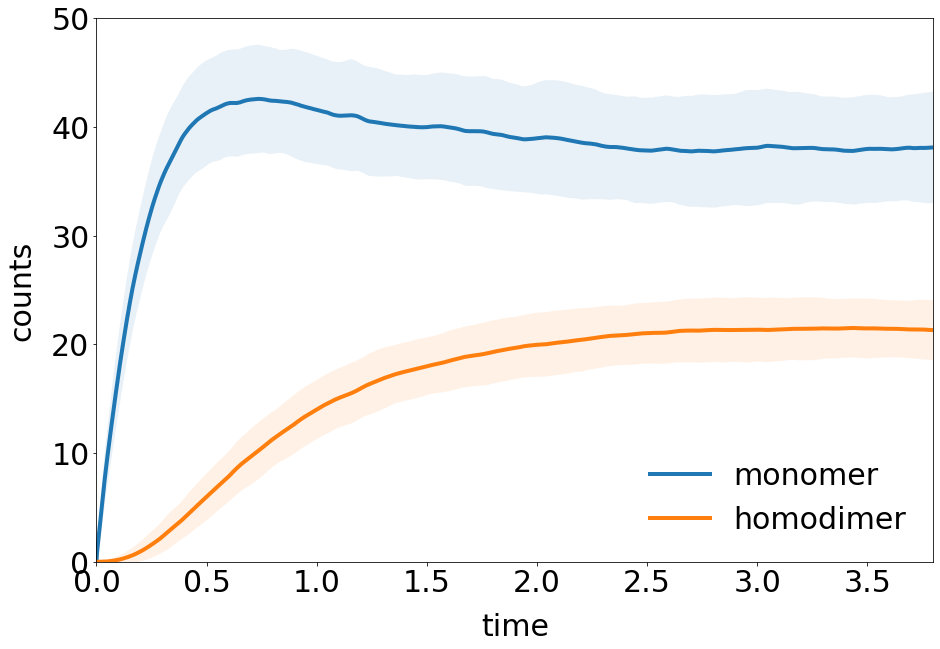

In [13]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(time,dimmon,label='monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(time[:,0], (dimmon-dimmonstd)[:,0], (dimmon+dimmonstd)[:,0], alpha=0.1)

plt.plot(time,dimtwoc,label='homodimer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(time[:,0], (dimtwoc - dimtwocstd)[:,0], (dimtwoc + dimtwocstd)[:,0], alpha=0.1)

plt.legend(loc='lower right',framealpha=0)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 50])
plt.xlim([0, 3.8])
plt.savefig('fig_homodimer_N100_r2d1p003q1.png',bbox_inches='tight')

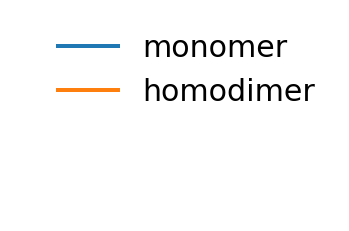

In [14]:
# OPTIONAL: Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='homodimer')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_homodimer_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# HOMOPOLYMER (N = 100) <a name="homopolymer"></a>

$$ N = 100, \quad r_{1} = 2, \quad r_{2} = 1, \quad r_{3} = 0.03, \quad r_{4} = 1 $$

In [15]:
# Import stochastic simulation results for average and standard deviation of homopolymer complex counts

dfpoltime = pd.read_csv(f"{folderpath}/homopolymer_timebins_N100.csv", header=None)
poltime = dfpoltime.to_numpy()
dfpol1c = pd.read_csv(f"{folderpath}/homopolymer_monbins_N100.csv", header=None)
polmon = dfpol1c.to_numpy()
dfpol1r = pd.read_csv(f"{folderpath}/homopolymer_1rbins_N100.csv", header=None)
pol1r = dfpol1r.to_numpy()
dfpol2c = pd.read_csv(f"{folderpath}/homopolymer_2cbins_N100.csv", header=None)
pol2c = dfpol2c.to_numpy()
dfpol2r = pd.read_csv(f"{folderpath}/homopolymer_2rbins_N100.csv", header=None)
pol2r = dfpol2r.to_numpy()
dfpol3c = pd.read_csv(f"{folderpath}/homopolymer_3cbins_N100.csv", header=None)
pol3c = dfpol3c.to_numpy()
dfpol3r = pd.read_csv(f"{folderpath}/homopolymer_3rbins_N100.csv", header=None)
pol3r = dfpol3r.to_numpy()
dfpol3upc = pd.read_csv(f"{folderpath}/homopolymer_3upcbins_N100.csv", header=None)
pol3upc = dfpol3upc.to_numpy()
dfpol3upr = pd.read_csv(f"{folderpath}/homopolymer_3uprbins_N100.csv", header=None)
pol3upr = dfpol3upr.to_numpy()

dfpol1cstd = pd.read_csv(f"{folderpath}/homopolymer_monbinsstd_N100.csv", header=None)
polmonstd = dfpol1cstd.to_numpy()
dfpol1rstd = pd.read_csv(f"{folderpath}/homopolymer_1rbinsstd_N100.csv", header=None)
pol1rstd = dfpol1rstd.to_numpy()
dfpol2cstd = pd.read_csv(f"{folderpath}/homopolymer_2cbinsstd_N100.csv", header=None)
pol2cstd = dfpol2cstd.to_numpy()
dfpol2rstd = pd.read_csv(f"{folderpath}/homopolymer_2rbinsstd_N100.csv", header=None)
pol2rstd = dfpol2rstd.to_numpy()
dfpol3cstd = pd.read_csv(f"{folderpath}/homopolymer_3cbinsstd_N100.csv", header=None)
pol3cstd = dfpol3cstd.to_numpy()
dfpol3rstd = pd.read_csv(f"{folderpath}/homopolymer_3rbinsstd_N100.csv", header=None)
pol3rstd = dfpol3rstd.to_numpy()
dfpol3upcstd = pd.read_csv(f"{folderpath}/homopolymer_3upcbinsstd_N100.csv", header=None)
pol3upcstd = dfpol3upcstd.to_numpy()
dfpol3uprstd = pd.read_csv(f"{folderpath}/homopolymer_3uprbinsstd_N100.csv", header=None)
pol3uprstd = dfpol3uprstd.to_numpy()

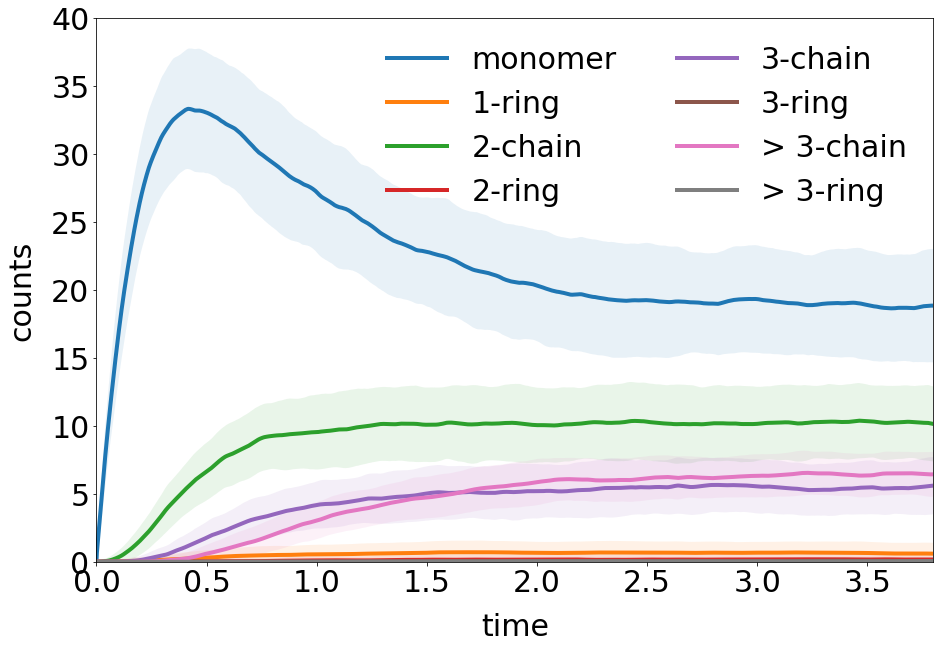

In [16]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(poltime,polmon,label='monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(poltime[:,0], (polmon-polmonstd)[:,0], (polmon+polmonstd)[:,0], alpha=0.1)

plt.plot(poltime,pol1r,label='1-ring',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(poltime[:,0], (pol1r-pol1rstd)[:,0], (pol1r+pol1rstd)[:,0], alpha=0.1)

plt.plot(poltime,pol2c,label='2-chain',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(poltime[:,0], (pol2c - pol2cstd)[:,0], (pol2c + pol2cstd)[:,0], alpha=0.1)

plt.plot(poltime,pol2r,label='2-ring',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(poltime[:,0], (pol2r - pol2rstd)[:,0], (pol2r + pol2rstd)[:,0], alpha=0.1)

plt.plot(poltime,pol3c,label='3-chain',alpha=1,linewidth=4, color='#9467bd')
plt.fill_between(poltime[:,0], (pol3c - pol3cstd)[:,0], (pol3c + pol3cstd)[:,0], alpha=0.1)

plt.plot(poltime,pol3r,label='3-ring',alpha=1,linewidth=4, color='#8c564b')
plt.fill_between(poltime[:,0], (pol3r - pol3rstd)[:,0], (pol3r + pol3rstd)[:,0], alpha=0.1)

plt.plot(poltime,pol3upc,label='> 3-chain',alpha=1,linewidth=4, color='#e377c2')
plt.fill_between(poltime[:,0], (pol3upc - pol3upcstd)[:,0], (pol3upc + pol3upcstd)[:,0], alpha=0.1)

plt.plot(poltime,pol3upr,label='> 3-ring',alpha=1,linewidth=4, color='#7f7f7f')
plt.fill_between(poltime[:,0], (pol3upr - pol3uprstd)[:,0], (pol3upr + pol3uprstd)[:,0], alpha=0.1)

plt.legend(loc='upper right',framealpha=0,ncol=2)
plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 40])
plt.xlim([0, 3.8])
plt.savefig('fig_homopolymer_N100_r2d1p003q1.png',bbox_inches='tight')

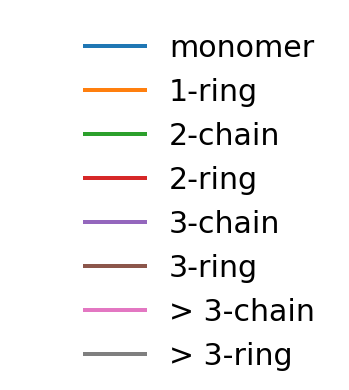

In [17]:
# OPTIONAL: Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='1-ring'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='2-chain'),
                   Line2D([0], [0], color='#d62728', lw=4, label='2-ring'),
                   Line2D([0], [0], color='#9467bd', lw=4, label='3-chain'),
                   Line2D([0], [0], color='#8c564b', lw=4, label='3-ring'),
                   Line2D([0], [0], color='#e377c2', lw=4, label='> 3-chain'),
                   Line2D([0], [0], color='#7f7f7f', lw=4, label='> 3-ring')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_homopolymer_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

---
# Stochastic simulations of various non-equilibrium systems (Fig. 9)
---

# HETERODIMER (N = 100) <a name="heterodimer"></a>

$$ N = 100, \quad r_{1}^+ = 2, \quad r_{1}^- = 1, \quad r_{2}^+ = 1, \quad r_{2}^- = 1, \quad r_{3}^+ = 0.03, \quad r_{3}^- = 1 $$

In [18]:
# Import stochastic simulation results for average and standard deviation of heterodimer complex counts

dfhetdimtime = pd.read_csv(f"{folderpath}/heterodimer_timebins_N100.csv", header=None)
hetdimtime = dfhetdimtime.to_numpy()
dfhetdimA = pd.read_csv(f"{folderpath}/heterodimer_Amonbins_N100.csv", header=None)
hetdimAmon = dfhetdimA.to_numpy()
dfhetdimB = pd.read_csv(f"{folderpath}/heterodimer_Bmonbins_N100.csv", header=None)
hetdimBmon = dfhetdimB.to_numpy()
dfhetdimAB = pd.read_csv(f"{folderpath}/heterodimer_ABdimbins_N100.csv", header=None)
hetdimABdim = dfhetdimAB.to_numpy()

dfhetdimAstd = pd.read_csv(f"{folderpath}/heterodimer_Amonbinsstd_N100.csv", header=None)
hetdimAmonstd = dfhetdimAstd.to_numpy()
dfhetdimBstd = pd.read_csv(f"{folderpath}/heterodimer_Bmonbinsstd_N100.csv", header=None)
hetdimBmonstd = dfhetdimBstd.to_numpy()
dfhetdimABstd = pd.read_csv(f"{folderpath}/heterodimer_ABdimbinsstd_N100.csv", header=None)
hetdimABdimstd = dfhetdimABstd.to_numpy()

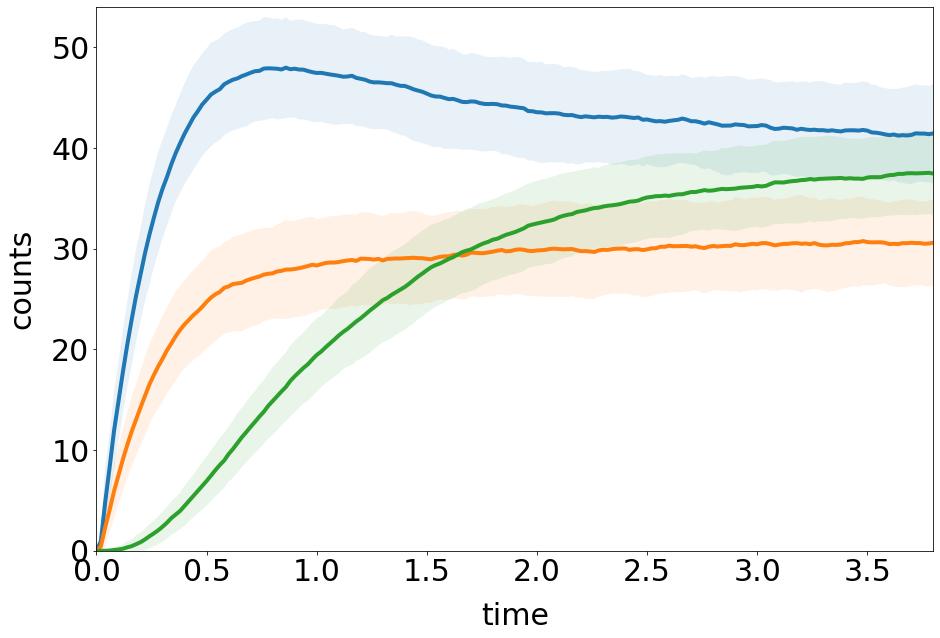

In [19]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(hetdimtime,hetdimAmon,label='A monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(hetdimtime[:,0], (hetdimAmon-hetdimAmonstd)[:,0], (hetdimAmon+hetdimAmonstd)[:,0], alpha=0.1)

plt.plot(hetdimtime,hetdimBmon,label='B monomer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(hetdimtime[:,0], (hetdimBmon - hetdimBmonstd)[:,0], (hetdimBmon + hetdimBmonstd)[:,0], alpha=0.1)

plt.plot(hetdimtime,hetdimABdim,label='AB dimer',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(hetdimtime[:,0], (hetdimABdim - hetdimABdimstd)[:,0], (hetdimABdim + hetdimABdimstd)[:,0], alpha=0.1)

plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 54])
plt.xlim([0, 3.8])
plt.savefig('fig_heterodimer_N100_r2d1r1d1p003q1.png',bbox_inches='tight')

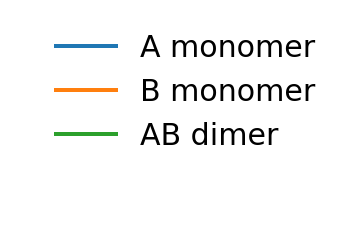

In [20]:
# Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='A monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='B monomer'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='AB dimer')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_heterodimer_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# OCCLUSIVE BINDING (N = 100) <a name="occlusive"></a>

$$ N = 100, \quad r_{1}^+ = 2, \quad r_{1}^- = 1, \quad r_{2}^+ = 1, \quad r_{2}^- = 1, \quad r_{3}^+ = 1, \quad r_{3}^- = 1, \quad r_{4}^+ = 0.06, \quad r_{4}^- = 1, \quad r_{5}^+ = 0.03, \quad r_{5}^- = 1 $$

In [21]:
# Import stochastic simulation results for average and standard deviation of complex counts from occlusive binding

dfocctime = pd.read_csv(f"{folderpath}/occlusive_timebins_N100.csv", header=None)
occtime = dfocctime.to_numpy()
dfoccA = pd.read_csv(f"{folderpath}/occlusive_Amonbins_N100.csv", header=None)
occA = dfoccA.to_numpy()
dfoccB = pd.read_csv(f"{folderpath}/occlusive_Bmonbins_N100.csv", header=None)
occB = dfoccB.to_numpy()
dfoccC = pd.read_csv(f"{folderpath}/occlusive_Cmonbins_N100.csv", header=None)
occC = dfoccC.to_numpy()
dfoccAB = pd.read_csv(f"{folderpath}/occlusive_ABdimbins_N100.csv", header=None)
occAB = dfoccAB.to_numpy()
dfoccAC = pd.read_csv(f"{folderpath}/occlusive_ACdimbins_N100.csv", header=None)
occAC = dfoccAC.to_numpy()

dfoccAstd = pd.read_csv(f"{folderpath}/occlusive_Amonbinsstd_N100.csv", header=None)
occAstd = dfoccAstd.to_numpy()
dfoccBstd = pd.read_csv(f"{folderpath}/occlusive_Bmonbinsstd_N100.csv", header=None)
occBstd = dfoccBstd.to_numpy()
dfoccCstd = pd.read_csv(f"{folderpath}/occlusive_Cmonbinsstd_N100.csv", header=None)
occCstd = dfoccCstd.to_numpy()
dfoccABstd = pd.read_csv(f"{folderpath}/occlusive_ABdimbinsstd_N100.csv", header=None)
occABstd = dfoccABstd.to_numpy()
dfoccACstd = pd.read_csv(f"{folderpath}/occlusive_ACdimbinsstd_N100.csv", header=None)
occACstd = dfoccACstd.to_numpy()

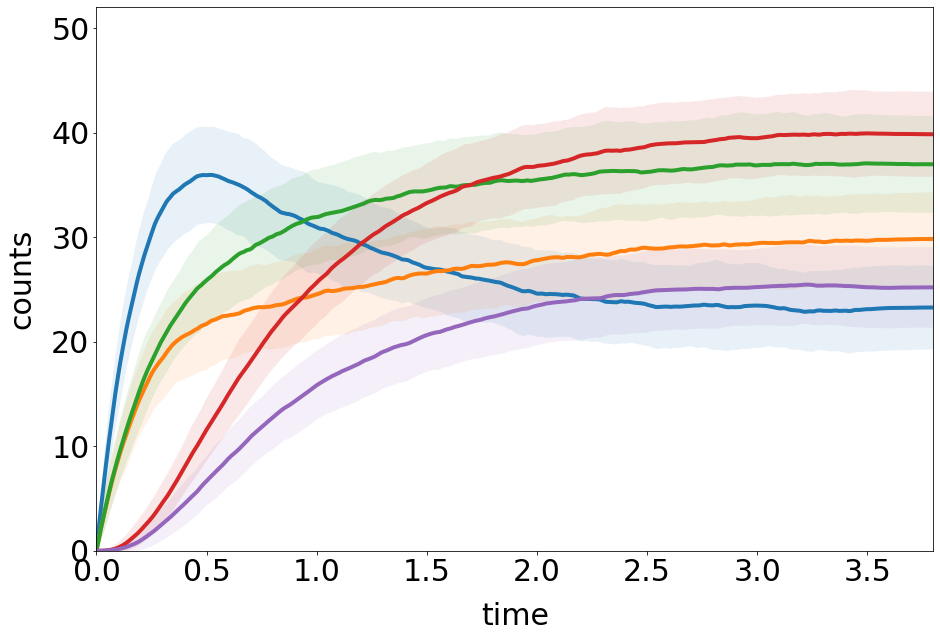

In [22]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(occtime,occA,label='A monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(occtime[:,0], (occA-occAstd)[:,0], (occA+occAstd)[:,0], alpha=0.1)

plt.plot(occtime,occB,label='B monomer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(occtime[:,0], (occB - occBstd)[:,0], (occB + occBstd)[:,0], alpha=0.1)

plt.plot(occtime,occC,label='C monomer',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(occtime[:,0], (occC - occCstd)[:,0], (occC + occCstd)[:,0], alpha=0.1)

plt.plot(occtime,occAB,label='AB dimer',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(occtime[:,0], (occAB - occABstd)[:,0], (occAB + occABstd)[:,0], alpha=0.1)

plt.plot(occtime,occAC,label='AC dimer',alpha=1,linewidth=4, color='#9467bd')
plt.fill_between(occtime[:,0], (occAC - occACstd)[:,0], (occAC + occACstd)[:,0], alpha=0.1)

plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 52])
plt.xlim([0, 3.8])
plt.savefig('fig_occlusivebinding_N100_rA2dA1rB1dB1rC1dC1pB006qB1pC003qC1.png',bbox_inches='tight')

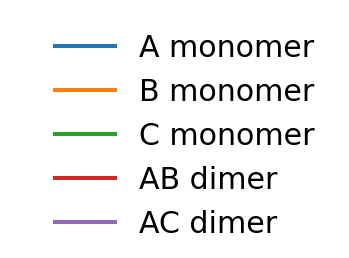

In [23]:
# Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='A monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='B monomer'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='C monomer'),
                   Line2D([0], [0], color='#d62728', lw=4, label='AB dimer'),
                   Line2D([0], [0], color='#9467bd', lw=4, label='AC dimer')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_occlusivebinding_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# COOPERATIVE BINDING (N = 100) <a name="cooperative"></a>

$$ N = 100, \quad r_{1}^+ = 2, \quad r_{1}^- = 1, \quad r_{2}^+ = 1, \quad r_{2}^- = 1, \quad r_{3}^+ = 0.06, \quad r_{3}^- = 1, \quad r_{4}^+ = 0.06, \quad r_{4}^- = 0.5 $$

In [24]:
# Import stochastic simulation results for average and standard deviation of complex counts from cooperative binding

dfcooptime = pd.read_csv(f"{folderpath}/coop_timebins_N100.csv", header=None)
cooptime = dfcooptime.to_numpy()
dfcoopA = pd.read_csv(f"{folderpath}/coop_Amonbins_N100.csv", header=None)
coopA = dfcoopA.to_numpy()
dfcoopB = pd.read_csv(f"{folderpath}/coop_Bmonbins_N100.csv", header=None)
coopB = dfcoopB.to_numpy()
dfcoopAB = pd.read_csv(f"{folderpath}/coop_ABdimbins_N100.csv", header=None)
coopAB = dfcoopAB.to_numpy()
dfcoopBAB = pd.read_csv(f"{folderpath}/coop_BABbins_N100.csv", header=None)
coopBAB = dfcoopBAB.to_numpy()

dfcoopAstd = pd.read_csv(f"{folderpath}/coop_Amonbinsstd_N100.csv", header=None)
coopAstd = dfcoopAstd.to_numpy()
dfcoopBstd = pd.read_csv(f"{folderpath}/coop_Bmonbinsstd_N100.csv", header=None)
coopBstd = dfcoopBstd.to_numpy()
dfcoopABstd = pd.read_csv(f"{folderpath}/coop_ABdimbinsstd_N100.csv", header=None)
coopABstd = dfcoopABstd.to_numpy()
dfcoopBABstd = pd.read_csv(f"{folderpath}/coop_BABbinsstd_N100.csv", header=None)
coopBABstd = dfcoopBABstd.to_numpy()

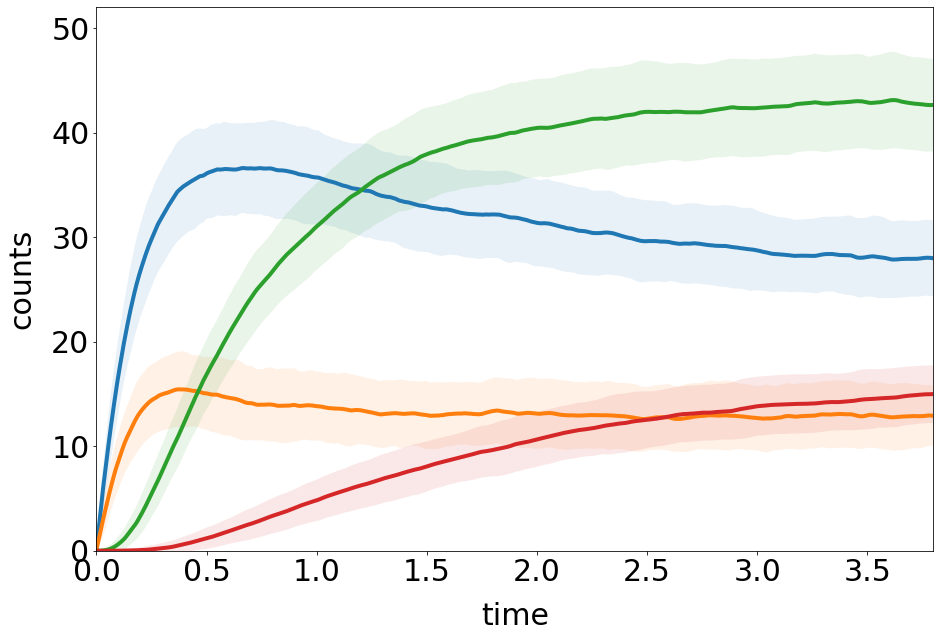

In [25]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(cooptime,coopA,label='A monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(cooptime[:,0], (coopA-coopAstd)[:,0], (coopA+coopAstd)[:,0], alpha=0.1)

plt.plot(cooptime,coopB,label='B monomer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(cooptime[:,0], (coopB - coopBstd)[:,0], (coopB + coopBstd)[:,0], alpha=0.1)

plt.plot(cooptime,coopAB,label='AB dimer',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(cooptime[:,0], (coopAB - coopABstd)[:,0], (coopAB + coopABstd)[:,0], alpha=0.1)

plt.plot(cooptime,coopBAB,label='BAB',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(cooptime[:,0], (coopBAB - coopBABstd)[:,0], (coopBAB + coopBABstd)[:,0], alpha=0.1)

plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 52])
plt.xlim([0, 3.8])
plt.savefig('fig_coop_N100_rdA2rdB1rdC1pB006qB1pBc006-NqBc05.png',bbox_inches='tight')

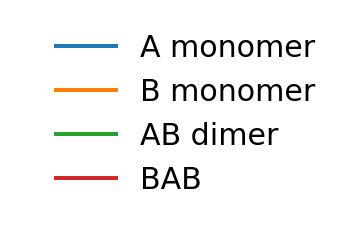

In [26]:
# Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='A monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='B monomer'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='AB dimer'),
                   Line2D([0], [0], color='#d62728', lw=4, label='BAB')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_coop_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# LINEAR HETEROPOLYMER (N = 100) <a name="heteropolymer"></a>

$$ N = 100, \quad r_{1}^+ = 2, \quad r_{1}^- = 1, \quad r_{2}^+ = 1, \quad r_{2}^- = 1, \quad r_{3}^+ = 0.03, \quad r_{3}^- = 1 $$

In [27]:
# Import stochastic simulation results for average and standard deviation of linear heteropolymer complex counts

dfhetpoltime = pd.read_csv(f"{folderpath}/heteropolymer_timebins_N100.csv", header=None)
hetpoltime = dfhetpoltime.to_numpy()
dfhetpolA = pd.read_csv(f"{folderpath}/heteropolymer_Amonbins_N100.csv", header=None)
hetpolA = dfhetpolA.to_numpy()
dfhetpolB = pd.read_csv(f"{folderpath}/heteropolymer_Bmonbins_N100.csv", header=None)
hetpolB = dfhetpolB.to_numpy()
dfhetpolAB2c = pd.read_csv(f"{folderpath}/heteropolymer_AB2cbins_N100.csv", header=None)
hetpolAB2c = dfhetpolAB2c.to_numpy()
dfhetpolAB2r = pd.read_csv(f"{folderpath}/heteropolymer_AB2rbins_N100.csv", header=None)
hetpolAB2r = dfhetpolAB2r.to_numpy()
dfhetpolABA3c = pd.read_csv(f"{folderpath}/heteropolymer_ABA3cbins_N100.csv", header=None)
hetpolABA3c = dfhetpolABA3c.to_numpy()
dfhetpolBAB3c = pd.read_csv(f"{folderpath}/heteropolymer_BAB3cbins_N100.csv", header=None)
hetpolBAB3c = dfhetpolBAB3c.to_numpy()
dfhetpol3upec = pd.read_csv(f"{folderpath}/heteropolymer_3upevencbins_N100.csv", header=None)
hetpol3upec = dfhetpol3upec.to_numpy()
dfhetpol3uper = pd.read_csv(f"{folderpath}/heteropolymer_3upevenrbins_N100.csv", header=None)
hetpol3uper = dfhetpol3uper.to_numpy()
dfhetpolAend3upoc = pd.read_csv(f"{folderpath}/heteropolymer_Aend3upoddcbins_N100.csv", header=None)
hetpolAend3upoc = dfhetpolAend3upoc.to_numpy()
dfhetpolBend3upoc = pd.read_csv(f"{folderpath}/heteropolymer_Bend3upoddcbins_N100.csv", header=None)
hetpolBend3upoc = dfhetpolBend3upoc.to_numpy()

dfhetpolAstd = pd.read_csv(f"{folderpath}/heteropolymer_Amonbinsstd_N100.csv", header=None)
hetpolAstd = dfhetpolAstd.to_numpy()
dfhetpolBstd = pd.read_csv(f"{folderpath}/heteropolymer_Bmonbinsstd_N100.csv", header=None)
hetpolBstd = dfhetpolBstd.to_numpy()
dfhetpolAB2cstd = pd.read_csv(f"{folderpath}/heteropolymer_AB2cbinsstd_N100.csv", header=None)
hetpolAB2cstd = dfhetpolAB2cstd.to_numpy()
dfhetpolAB2rstd = pd.read_csv(f"{folderpath}/heteropolymer_AB2rbinsstd_N100.csv", header=None)
hetpolAB2rstd = dfhetpolAB2rstd.to_numpy()
dfhetpolABA3cstd = pd.read_csv(f"{folderpath}/heteropolymer_ABA3cbinsstd_N100.csv", header=None)
hetpolABA3cstd = dfhetpolABA3cstd.to_numpy()
dfhetpolBAB3cstd = pd.read_csv(f"{folderpath}/heteropolymer_BAB3cbinsstd_N100.csv", header=None)
hetpolBAB3cstd = dfhetpolBAB3cstd.to_numpy()
dfhetpol3upecstd = pd.read_csv(f"{folderpath}/heteropolymer_3upevencbinsstd_N100.csv", header=None)
hetpol3upecstd = dfhetpol3upecstd.to_numpy()
dfhetpol3uperstd = pd.read_csv(f"{folderpath}/heteropolymer_3upevenrbinsstd_N100.csv", header=None)
hetpol3uperstd = dfhetpol3uperstd.to_numpy()
dfhetpolAend3upocstd = pd.read_csv(f"{folderpath}/heteropolymer_Aend3upoddcbinsstd_N100.csv", header=None)
hetpolAend3upocstd = dfhetpolAend3upocstd.to_numpy()
dfhetpolBend3upocstd = pd.read_csv(f"{folderpath}/heteropolymer_Bend3upoddcbinsstd_N100.csv", header=None)
hetpolBend3upocstd = dfhetpolBend3upocstd.to_numpy()

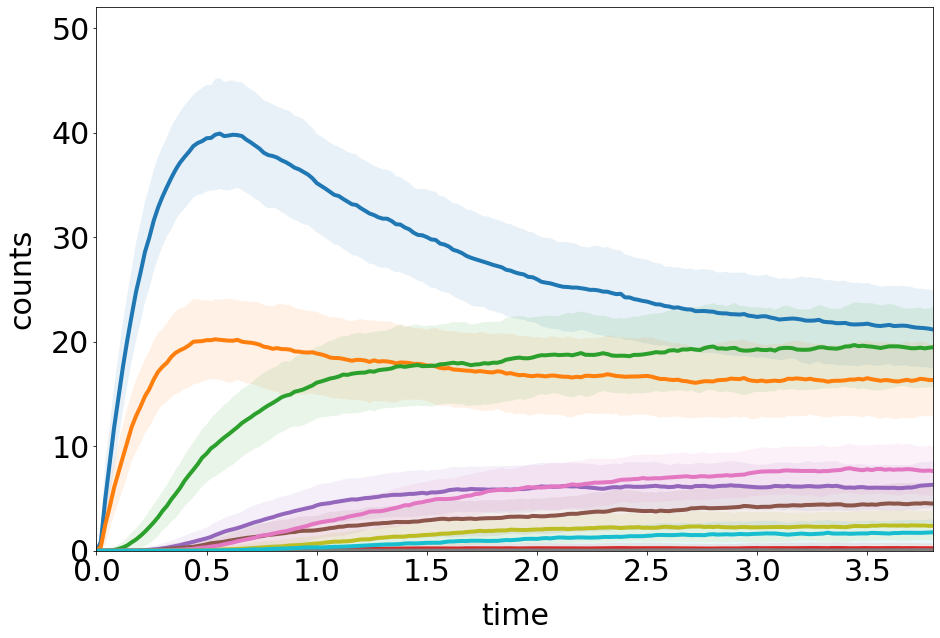

In [28]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(hetpoltime,hetpolA,label='A monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(hetpoltime[:,0], (hetpolA-hetpolAstd)[:,0], (hetpolA+hetpolAstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolB,label='B monomer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(hetpoltime[:,0], (hetpolB - hetpolBstd)[:,0], (hetpolB + hetpolBstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolAB2c,label='AB 2-chain',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(hetpoltime[:,0], (hetpolAB2c - hetpolAB2cstd)[:,0], (hetpolAB2c + hetpolAB2cstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolAB2r,label='AB 2-ring',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(hetpoltime[:,0], (hetpolAB2r - hetpolAB2rstd)[:,0], (hetpolAB2r + hetpolAB2rstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolABA3c,label='ABA 3-chain',alpha=1,linewidth=4, color='#9467bd')
plt.fill_between(hetpoltime[:,0], (hetpolABA3c - hetpolABA3cstd)[:,0], (hetpolABA3c + hetpolABA3cstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolBAB3c,label='BAB 3-chain',alpha=1,linewidth=4, color='#8c564b')
plt.fill_between(hetpoltime[:,0], (hetpolBAB3c - hetpolBAB3cstd)[:,0], (hetpolBAB3c + hetpolBAB3cstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpol3upec,label='> 3-even-chain',alpha=1,linewidth=4, color='#e377c2')
plt.fill_between(hetpoltime[:,0], (hetpol3upec - hetpol3upecstd)[:,0], (hetpol3upec + hetpol3upecstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpol3uper,label='> 3-even-ring',alpha=1,linewidth=4, color='#7f7f7f')
plt.fill_between(hetpoltime[:,0], (hetpol3uper - hetpol3uperstd)[:,0], (hetpol3uper + hetpol3uperstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolAend3upoc,label='A-ended > 3-odd-chain',alpha=1,linewidth=4, color='#bcbd22')
plt.fill_between(hetpoltime[:,0], (hetpolAend3upoc - hetpolAend3upocstd)[:,0], (hetpolAend3upoc + hetpolAend3upocstd)[:,0], alpha=0.1)

plt.plot(hetpoltime,hetpolBend3upoc,label='B-ended > 3-odd-chain',alpha=1,linewidth=4, color='#17becf')
plt.fill_between(hetpoltime[:,0], (hetpolBend3upoc - hetpolBend3upocstd)[:,0], (hetpolBend3upoc + hetpolBend3upocstd)[:,0], alpha=0.1)

plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 52])
plt.xlim([0, 3.8])
plt.savefig('fig_heteropolymer_N100_rA2dA1rB1dB1p003q1p003q1.png',bbox_inches='tight')

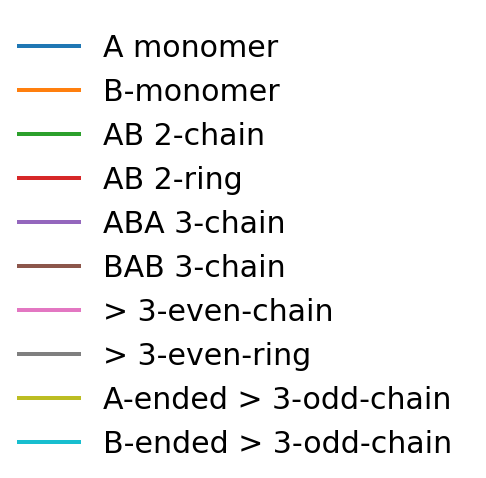

In [29]:
# Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='A monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='B-monomer'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='AB 2-chain'),
                   Line2D([0], [0], color='#d62728', lw=4, label='AB 2-ring'),
                   Line2D([0], [0], color='#9467bd', lw=4, label='ABA 3-chain'),
                   Line2D([0], [0], color='#8c564b', lw=4, label='BAB 3-chain'),
                   Line2D([0], [0], color='#e377c2', lw=4, label='> 3-even-chain'),
                   Line2D([0], [0], color='#7f7f7f', lw=4, label='> 3-even-ring'),
                   Line2D([0], [0], color='#bcbd22', lw=4, label='A-ended > 3-odd-chain'),
                   Line2D([0], [0], color='#17becf', lw=4, label='B-ended > 3-odd-chain')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_heteropolymer_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

# BRANCHED HOMOPOLYMER (N = 100) <a name="branchedhomopolymer"></a>

$$ N = 100, \quad r_{1}^+ = 2, \quad r_{1}^- = 1, \quad r_{2}^+ = 0.03, \quad r_{2}^- = 1 $$

In [30]:
# Import stochastic simulation results for average and standard deviation of branched homopolymer complex counts

dfbpoltime = pd.read_csv(f"{folderpath}/branchhomopol_timebins_N100.csv", header=None)
bpoltime = dfbpoltime.to_numpy()
dfbpol1c = pd.read_csv(f"{folderpath}/branchhomopol_monbins_N100.csv", header=None)
bpolmon = dfbpol1c.to_numpy()
dfbpol2m = pd.read_csv(f"{folderpath}/branchhomopol_2merbins_N100.csv", header=None)
bpol2m = dfbpol2m.to_numpy()
dfbpol3m = pd.read_csv(f"{folderpath}/branchhomopol_3merbins_N100.csv", header=None)
bpol3m = dfbpol3m.to_numpy()
dfbpol4m = pd.read_csv(f"{folderpath}/branchhomopol_4merbins_N100.csv", header=None)
bpol4m = dfbpol4m.to_numpy()
dfbpol5m = pd.read_csv(f"{folderpath}/branchhomopol_5merbins_N100.csv", header=None)
bpol5m = dfbpol5m.to_numpy()
dfbpol5upm = pd.read_csv(f"{folderpath}/branchhomopol_5upmerbins_N100.csv", header=None)
bpol5upm = dfbpol5upm.to_numpy()

dfbpol1cstd = pd.read_csv(f"{folderpath}/branchhomopol_monbinsstd_N100.csv", header=None)
bpolmonstd = dfbpol1cstd.to_numpy()
dfbpol2mstd = pd.read_csv(f"{folderpath}/branchhomopol_2merbinsstd_N100.csv", header=None)
bpol2mstd = dfbpol2mstd.to_numpy()
dfbpol3mstd = pd.read_csv(f"{folderpath}/branchhomopol_3merbinsstd_N100.csv", header=None)
bpol3mstd = dfbpol3mstd.to_numpy()
dfbpol4mstd = pd.read_csv(f"{folderpath}/branchhomopol_4merbinsstd_N100.csv", header=None)
bpol4mstd = dfbpol4mstd.to_numpy()
dfbpol5mstd = pd.read_csv(f"{folderpath}/branchhomopol_5merbinsstd_N100.csv", header=None)
bpol5mstd = dfbpol5mstd.to_numpy()
dfbpol5upmstd = pd.read_csv(f"{folderpath}/branchhomopol_5upmerbinsstd_N100.csv", header=None)
bpol5upmstd = dfbpol5upmstd.to_numpy()

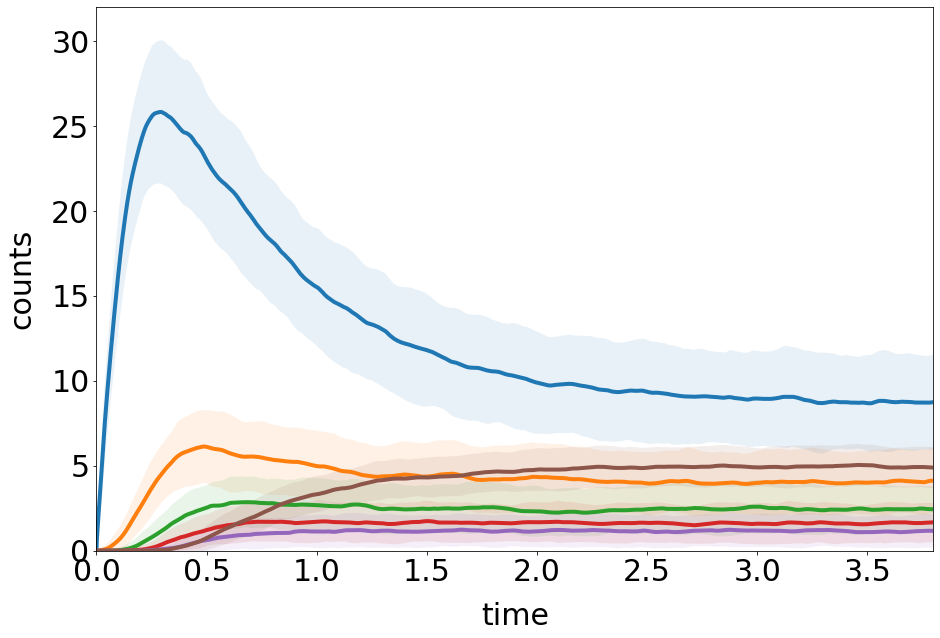

In [31]:
# Plot

fig = plt.figure(figsize=(15,10),facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 30})
plt.plot(bpoltime,bpolmon,label='monomer',alpha=1,linewidth=4, color='#1f77b4')
plt.fill_between(bpoltime[:,0], (bpolmon-bpolmonstd)[:,0], (bpolmon+bpolmonstd)[:,0], alpha=0.1)

plt.plot(bpoltime,bpol2m,label='2-mer',alpha=1,linewidth=4, color='#ff7f0e')
plt.fill_between(bpoltime[:,0], (bpol2m - bpol2mstd)[:,0], (bpol2m + bpol2mstd)[:,0], alpha=0.1)

plt.plot(bpoltime,bpol3m,label='3-mer',alpha=1,linewidth=4, color='#2ca02c')
plt.fill_between(bpoltime[:,0], (bpol3m - bpol3mstd)[:,0], (bpol3m + bpol3mstd)[:,0], alpha=0.1)

plt.plot(bpoltime,bpol4m,label='4-mer',alpha=1,linewidth=4, color='#d62728')
plt.fill_between(bpoltime[:,0], (bpol4m - bpol4mstd)[:,0], (bpol4m + bpol4mstd)[:,0], alpha=0.1)

plt.plot(bpoltime,bpol5m,label='5-mer',alpha=1,linewidth=4, color='#9467bd')
plt.fill_between(bpoltime[:,0], (bpol5m - bpol5mstd)[:,0], (bpol5m + bpol5mstd)[:,0], alpha=0.1)

plt.plot(bpoltime,bpol5upm,label='> 5-mer',alpha=1,linewidth=4, color='#8c564b')
plt.fill_between(bpoltime[:,0], (bpol5upm - bpol5upmstd)[:,0], (bpol5upm + bpol5upmstd)[:,0], alpha=0.1)

plt.xlabel('time',labelpad=15)
plt.ylabel('counts',labelpad=15)
plt.ylim([0, 32])
plt.xlim([0, 3.8])
plt.savefig('fig_branchhomopol_N100_r2d1p003q1.png',bbox_inches='tight')

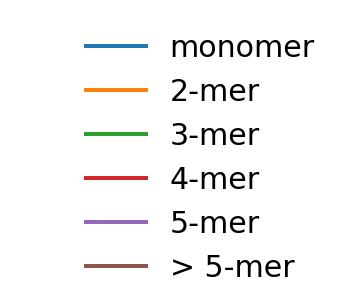

In [32]:
# Manually generate png of figure legend

legend_elements = [Line2D([0], [0], color='#1f77b4', lw=4, label='monomer'),
                   Line2D([0], [0], color='#ff7f0e', lw=4, label='2-mer'),
                   Line2D([0], [0], color='#2ca02c', lw=4, label='3-mer'),
                   Line2D([0], [0], color='#d62728', lw=4, label='4-mer'),
                   Line2D([0], [0], color='#9467bd', lw=4, label='5-mer'),
                   Line2D([0], [0], color='#8c564b', lw=4, label='> 5-mer')]

legend = plt.legend(handles=legend_elements,frameon=False)

def export_legend(legend, filename="fig_branchhomopol_legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    legend.axes.axis("off")
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()